In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

In [30]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Vegetable_Images/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 15000 files belonging to 15 classes.


In [31]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Vegetable_Images/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3000 files belonging to 15 classes.


In [32]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=15,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
469/469 [==============================] - 339s 718ms/step - loss: 2.5172 - accuracy: 0.3023 - val_loss: 1.7011 - val_accuracy: 0.5037
Epoch 2/15
469/469 [==============================] - 330s 704ms/step - loss: 1.3398 - accuracy: 0.5657 - val_loss: 0.9339 - val_accuracy: 0.7160
Epoch 3/15
469/469 [==============================] - 334s 713ms/step - loss: 0.8933 - accuracy: 0.7097 - val_loss: 0.5370 - val_accuracy: 0.8377
Epoch 4/15
469/469 [==============================] - 332s 707ms/step - loss: 0.6851 - accuracy: 0.7871 - val_loss: 0.4432 - val_accuracy: 0.8647
Epoch 5/15
469/469 [==============================] - 333s 710ms/step - loss: 0.4873 - accuracy: 0.8453 - val_loss: 0.4173 - val_accuracy: 0.8857
Epoch 6/15
469/469 [==============================] - 326s 692ms/step - loss: 0.3658 - accuracy: 0.8860 - val_loss: 0.3840 - val_accuracy: 0.8880
Epoch 7/15
469/469 [==============================] - 330s 703ms/step - loss: 0.3089 - accuracy: 0.9072 - val_loss: 0.4778 -

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [9]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

469/469 [==============================] - 152s 324ms/step - loss: 0.1253 - accuracy: 0.9621
Training accuracy: 0.9621333479881287
94/94 [==============================] - 19s 196ms/step - loss: 0.6011 - accuracy: 0.8580
Validation accuracy: 0.8579999804496765


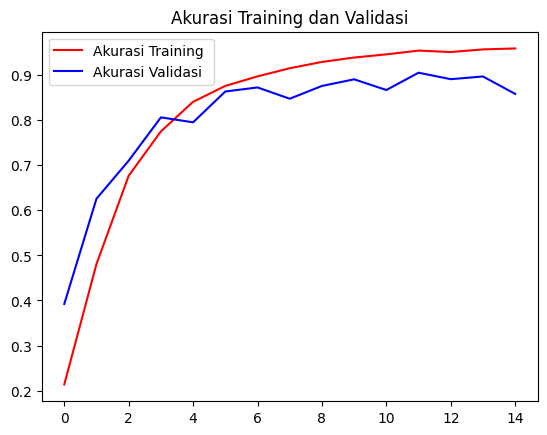

<Figure size 640x480 with 0 Axes>

In [25]:
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

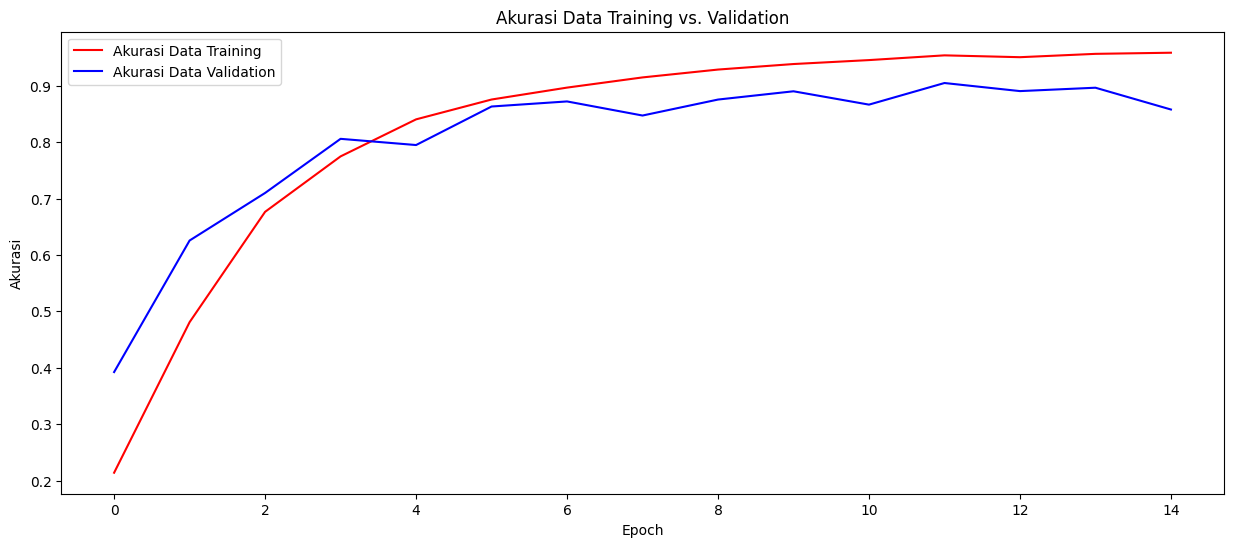

<Figure size 640x480 with 0 Axes>

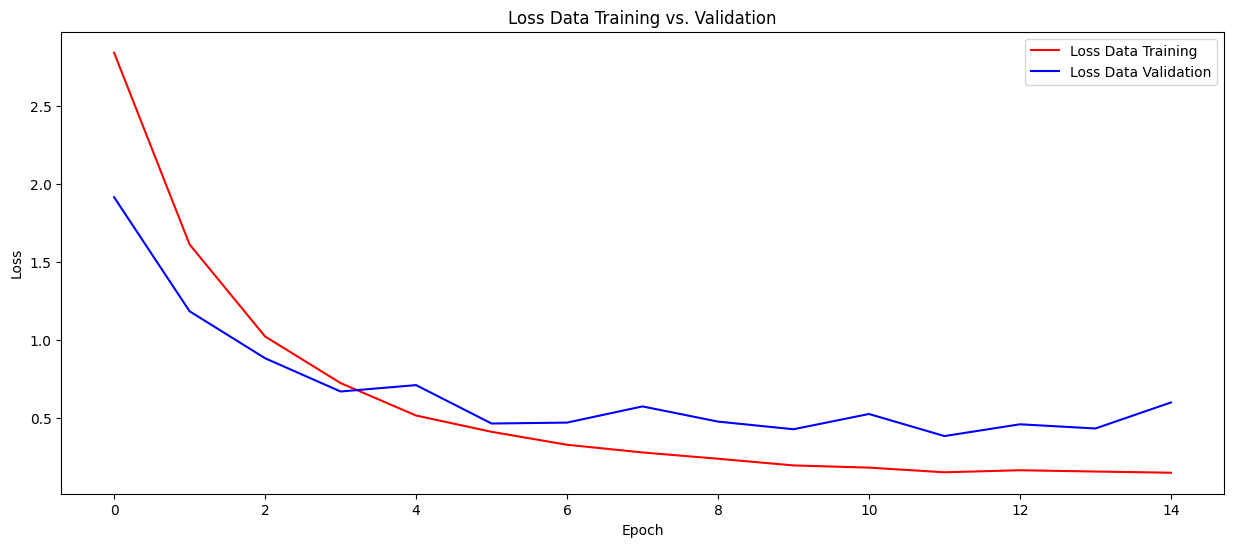

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(15, 6))

accuracy = training_history.history ['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Akurasi Data Training')
plt.plot(epochs, val_accuracy, 'b', label='Akurasi Data Validation')
plt.title('Akurasi Data Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(epochs, loss, 'r', label='Loss Data Training')
plt.plot(epochs, val_loss, 'b', label='Loss Data Validation')
plt.title('Loss Data Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [24]:
training_history.history
print(training_history.history.keys())
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))
training_history.history['accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Validation set Accuracy: 85.79999804496765 %


[0.21379999816417694,
 0.4808666706085205,
 0.6765333414077759,
 0.7748666405677795,
 0.8405333161354065,
 0.8757333159446716,
 0.8968666791915894,
 0.9149333238601685,
 0.9288666844367981,
 0.9386666417121887,
 0.9456666707992554,
 0.9540666937828064,
 0.9508000016212463,
 0.9567333459854126,
 0.958733320236206]

In [18]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Vegetable_Images/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2630 files belonging to 15 classes.


In [19]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

83/83 [==============================] - 315s 3s/step - loss: 0.5676 - accuracy: 0.8624
Test accuracy: 0.8623574376106262


In [21]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
import tensorflow as tf
from keras.models import load_model

model = load_model("/content/trained_model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)

lite_model = converter.convert()

with open("lite_model.tflite", "wb") as f:
  f.write(lite_model)

In [23]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)